In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sys
import warnings


if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Load iris flower dataset

In [2]:
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [4]:
#Understanding of dataset

In [5]:
print(iris.target_names) #output

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.feature_names) #inputs

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#print the iris data 
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
#create dataframe 
df=pd.DataFrame({
    'sepal_length':iris.data[:,0], 'sepal_width':iris.data[:,1], 'petal_length':iris.data[:,2], 'petal_width':iris.data[:,3],
    'species':iris.target
})

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.shape

(150, 5)

In [13]:
#Is null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df['species'].value_counts() #'setosa':0 'versicolor':1 'virginica':2

0    50
1    50
2    50
Name: species, dtype: int64

<AxesSubplot:>

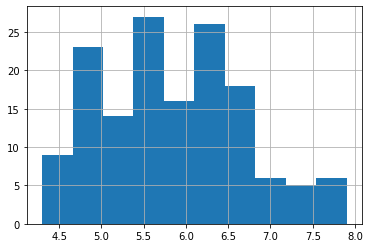

In [16]:
df['sepal_length'].hist()

<AxesSubplot:>

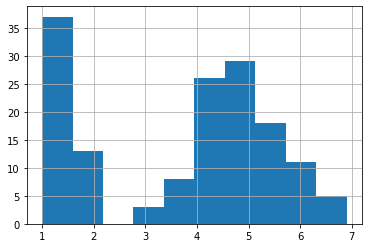

In [17]:
df['petal_length'].hist()

In [20]:
colors=['red','purple','orange']
species=['setosa' 'versicolor' 'virginica']



In [21]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(df)

<AxesSubplot:>

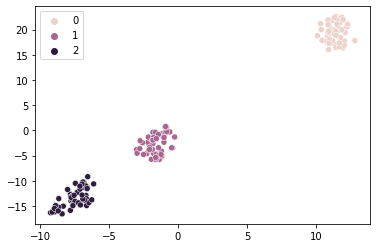

In [28]:
sns.scatterplot(X_2d[:,0], X_2d[:,1], hue= iris.target)

In [29]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

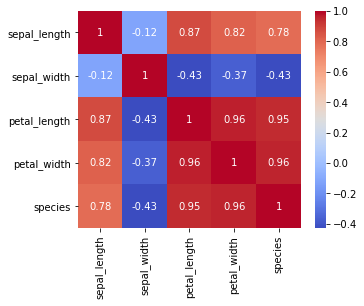

In [30]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot = True,ax=ax,cmap = 'coolwarm')

In [31]:
from sklearn.model_selection import train_test_split
#train
#test
x= df.drop(columns=['species']) #features
y= df['species'] #target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=1)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
pred= knn.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(pred, y_test))

[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]


In [34]:
accuracy_knn = knn.score(x_test,y_test)*100
print("KNN Accuracy is:",accuracy_knn)

KNN Accuracy is: 97.77777777777777
